Kelompok 5 PYTN-KS08

**Muhammad Ismail** - **PYTN-KS08-011**

**Syahrani Nabilla Kharisma H** - **PYTN-KS08-013**

**Shendy Krisyohanda** - **PYTN-KS08-021**

# Pengenalan

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.


**Attribute Information:**
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up


TARGET : DEATH_EVENT


# Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import graphviz 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import export_graphviz
from google.colab import files
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import pickle
from imblearn.over_sampling import SMOTE

#Data Loading

In [2]:
!pip install kaggle
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mail2418","key":"784e529f058f35edd5174910c6d63425"}'}

In [3]:
# membuat directory dari kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

401 - Unauthorized


In [7]:
# unzip dan lihat list dataset
!mkdir heart-failure-clinical-data
!unzip heart-failure-clinical-data.zip -d heart-failure-clinical-data

mkdir: cannot create directory ‘heart-failure-clinical-data’: File exists
Archive:  heart-failure-clinical-data.zip
  inflating: heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv  


In [8]:
df = pd.read_csv('/content/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Melihat deskripsi dataset

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**Age**

*   Rata-rata Usia pada Pasien Penyakit Jantung berkisar 60 Tahun
*   Usia terendah pada Pasien Penyakit Jantung berada pada umur 40 Tahun
*   Usia tertinggi pada Pasien Penyakit Jantung berada pada umur 95 Tahun

**Anemia**

* Rata-rata nilai Anemia pada Pasien Penyakit Jantung berada di 0.431438 

* Anemia terendah pada Pasien Penyakit Jantung berada di 0 (**tidak mengalami anemia**)
* Anemia tertinggi pada Pasien Penyakit Jantung berada di 1.0 (**mengalami anemia**)

**Creatinin Fosfokinase**
* Rata-rata Creatinin Fosfokinase pada Pasien Penyakit Jantung berada di 581.839465
* Creatinin Fosfokinase terendah pada Pasien Penyakit Jantung berada di 23.00
* Creatinin Fosfokinase tertinggi pada Pasien Penyakit Jantung berada di 7861.00

**Diabetes**
* Rata-rata nilai Diabetes pada Pasien Penyakit Jantung berada di 0.418060 

* Diabetes terendah pada Pasien Penyakit Jantung berada di 0 (**tidak mengalami diabetes**)

* Diabetes tertinggi pada Pasien Penyakit Jantung berada di 1.0 (**mengalami diabetes**)

## Mengecek dataset apakah terdapat null

In [11]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Meliat dimensi dataset

In [12]:
df.shape

(299, 13)

#Data Cleaning

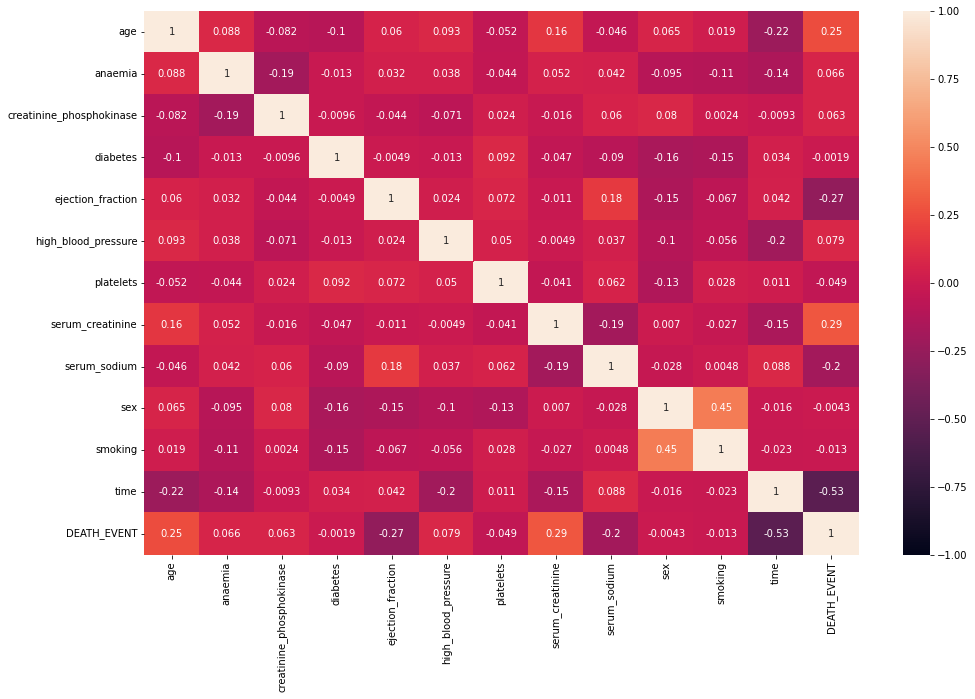

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.savefig("korelasi_fitur.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

drop fitur yang tidak relevan dengan DEATH_EVENT

In [14]:
new_df = df.copy()
new_df.drop(columns=['time','serum_sodium','ejection_fraction'], inplace=True)

In [15]:
new_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,1,265000.00,1.9,1,0,1
1,55.0,0,7861,0,0,263358.03,1.1,1,0,1
2,65.0,0,146,0,0,162000.00,1.3,1,1,1
3,50.0,1,111,0,0,210000.00,1.9,1,0,1
4,65.0,1,160,1,0,327000.00,2.7,0,0,1


# EDA

In [16]:
df_EDA = df.copy()
df_EDA['young_person'] = df_EDA['age'].apply(lambda x: 1 if x < 50 else 0)
df_EDA

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,young_person
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,1
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,1


## Bar plot

In [17]:
young_anemia_diabetes_hbp_sex_smoking = df_EDA[['young_person','anaemia','diabetes','high_blood_pressure','sex','smoking']]
young_anemia_diabetes_hbp_sex_smoking.head()

,young_person,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,0,1,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,1,0,0,1,0
4,0,1,1,0,0,0


In [18]:
group1 = young_anemia_diabetes_hbp_sex_smoking.groupby(['young_person','sex']).sum()
group1

anaemia  diabetes  high_blood_pressure  smoking
young_person sex                                                 
0            0         44        45                   36        4
             1         71        59                   55       81
1            0          8        10                    8        0
             1          6        11                    6       11

<Figure size 1152x720 with 0 Axes>

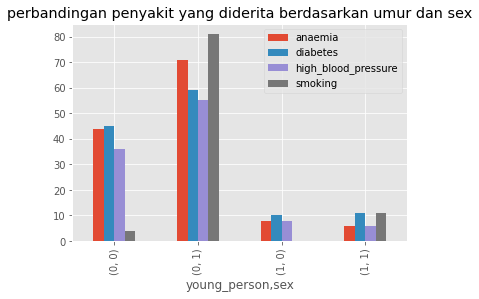

In [19]:
plt.figure(figsize=(16,10))
plt.style.use('ggplot')
group1.plot(kind='bar',title='perbandingan penyakit yang diderita berdasarkan umur dan sex')
plt.savefig("perbandingan_sex_umur.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

## Scatter Plot

In [20]:
np.unique(df_EDA['serum_creatinine'])

array([0.5 , 0.6 , 0.7 , 0.75, 0.8 , 0.9 , 1.  , 1.1 , 1.18, 1.2 , 1.3 ,
       1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.83, 1.9 , 2.  , 2.1 , 2.2 , 2.3 ,
       2.4 , 2.5 , 2.7 , 2.9 , 3.  , 3.2 , 3.4 , 3.5 , 3.7 , 3.8 , 4.  ,
       4.4 , 5.  , 5.8 , 6.1 , 6.8 , 9.  , 9.4 ])

In [21]:
np.unique(df_EDA['time'])

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285])

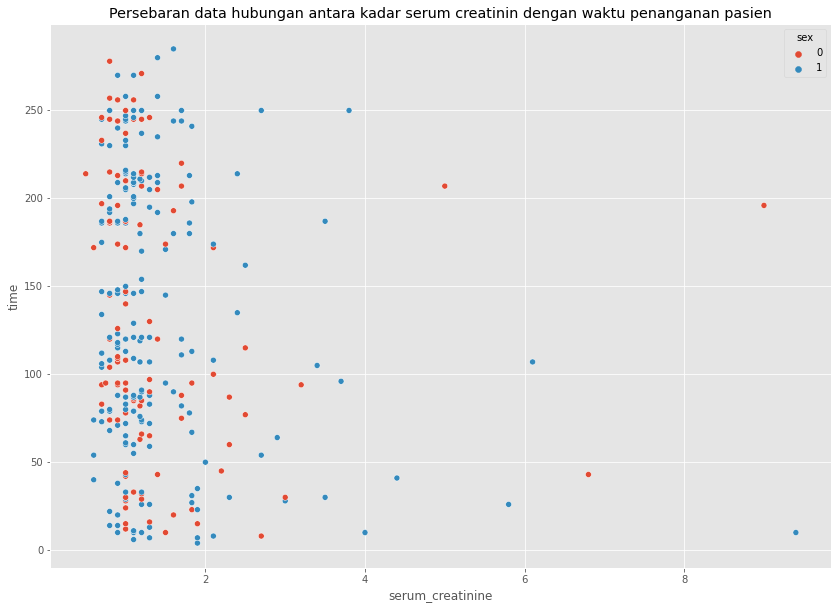

In [22]:
plt.figure(figsize=(14,10))
plt.title('Persebaran data hubungan antara kadar serum creatinin dengan waktu penanganan pasien')
sns.scatterplot(data=df_EDA, x='serum_creatinine', y='time', hue='sex')
plt.savefig("scatter_serum_time.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

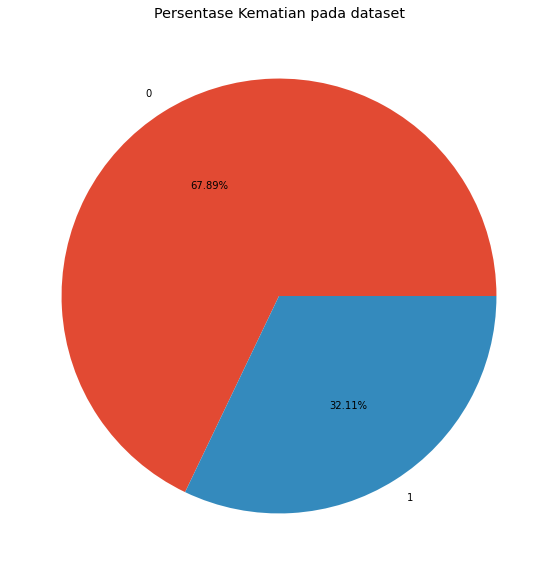

In [23]:
plt.figure(figsize=(16,10))

df_EDA['DEATH_EVENT'].value_counts().plot(
    kind='pie',
    autopct='%.2f%%',
    shadow=False
)
plt.title('Persentase Kematian pada dataset')
plt.ylabel('')
plt.savefig("pie_DE.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

#Data Preprocessing

In [24]:
new_df_scaled = new_df.copy()
numerics = ['int64','float64']
# new_df_scaled.drop(columns=['DEATH_EVENT'],inplace=True)
scaler = StandardScaler()
numeric_df = new_df.select_dtypes(include=numerics)
for column in numeric_df.columns:
  new_df_scaled[column] = scaler.fit_transform(new_df_scaled[column].values.reshape(-1,1))
new_df_scaled['DEATH_EVENT'] = new_df['DEATH_EVENT']
new_df_scaled['young_person'] = new_df['age'].apply(lambda x: 1 if x < 50 else 0)
# new_df_scaled = new_df_scaled.drop(columns=['age'])

In [25]:
new_df_scaled

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,platelets,serum_creatinine,sex,smoking,DEATH_EVENT,young_person
0,1.192945,-0.871105,0.000166,-0.847579,1.359272,1.681648e-02,0.490057,0.735688,-0.687682,1,0
1,-0.491279,-0.871105,7.514640,-0.847579,-0.735688,7.535660e-09,-0.284552,0.735688,-0.687682,1,0
2,0.350833,-0.871105,-0.449939,-0.847579,-0.735688,-1.038073e+00,-0.090900,0.735688,1.454161,1,0
3,-0.912335,1.147968,-0.486071,-0.847579,-0.735688,-5.464741e-01,0.490057,0.735688,-0.687682,1,0
4,0.350833,1.147968,-0.435486,1.179830,-0.735688,6.517986e-01,1.264666,-1.359272,-0.687682,1,0
...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,1.359272,-1.109765e+00,-0.284552,0.735688,1.454161,0,0
295,-0.491279,-0.871105,1.278215,-0.847579,-0.735688,6.802472e-02,-0.187726,-1.359272,-0.687682,0,0
296,-1.333392,-0.871105,1.525979,1.179830,-0.735688,4.902082e+00,-0.575031,-1.359272,-0.687682,0,1
297,-1.333392,-0.871105,1.890398,-0.847579,-0.735688,-1.263389e+00,0.005926,0.735688,1.454161,0,1


## Data Splitting dengan dan tanpa SMOTE (Synthetic Minority Oversampling Technique).

Menggunakan SMOTE agar meng-oversampling data

In [26]:
X = new_df_scaled.drop(columns=['DEATH_EVENT'])
y = new_df_scaled['DEATH_EVENT']

smote = SMOTE()
X_s, y_s = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.1, random_state=42)

#Pendefinisian Model

## Decision Tree

In [27]:
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model_s = DecisionTreeClassifier(criterion='gini')
dt_model.fit(X_train, y_train)
dt_model_s.fit(Xs_train, ys_train)

DecisionTreeClassifier()

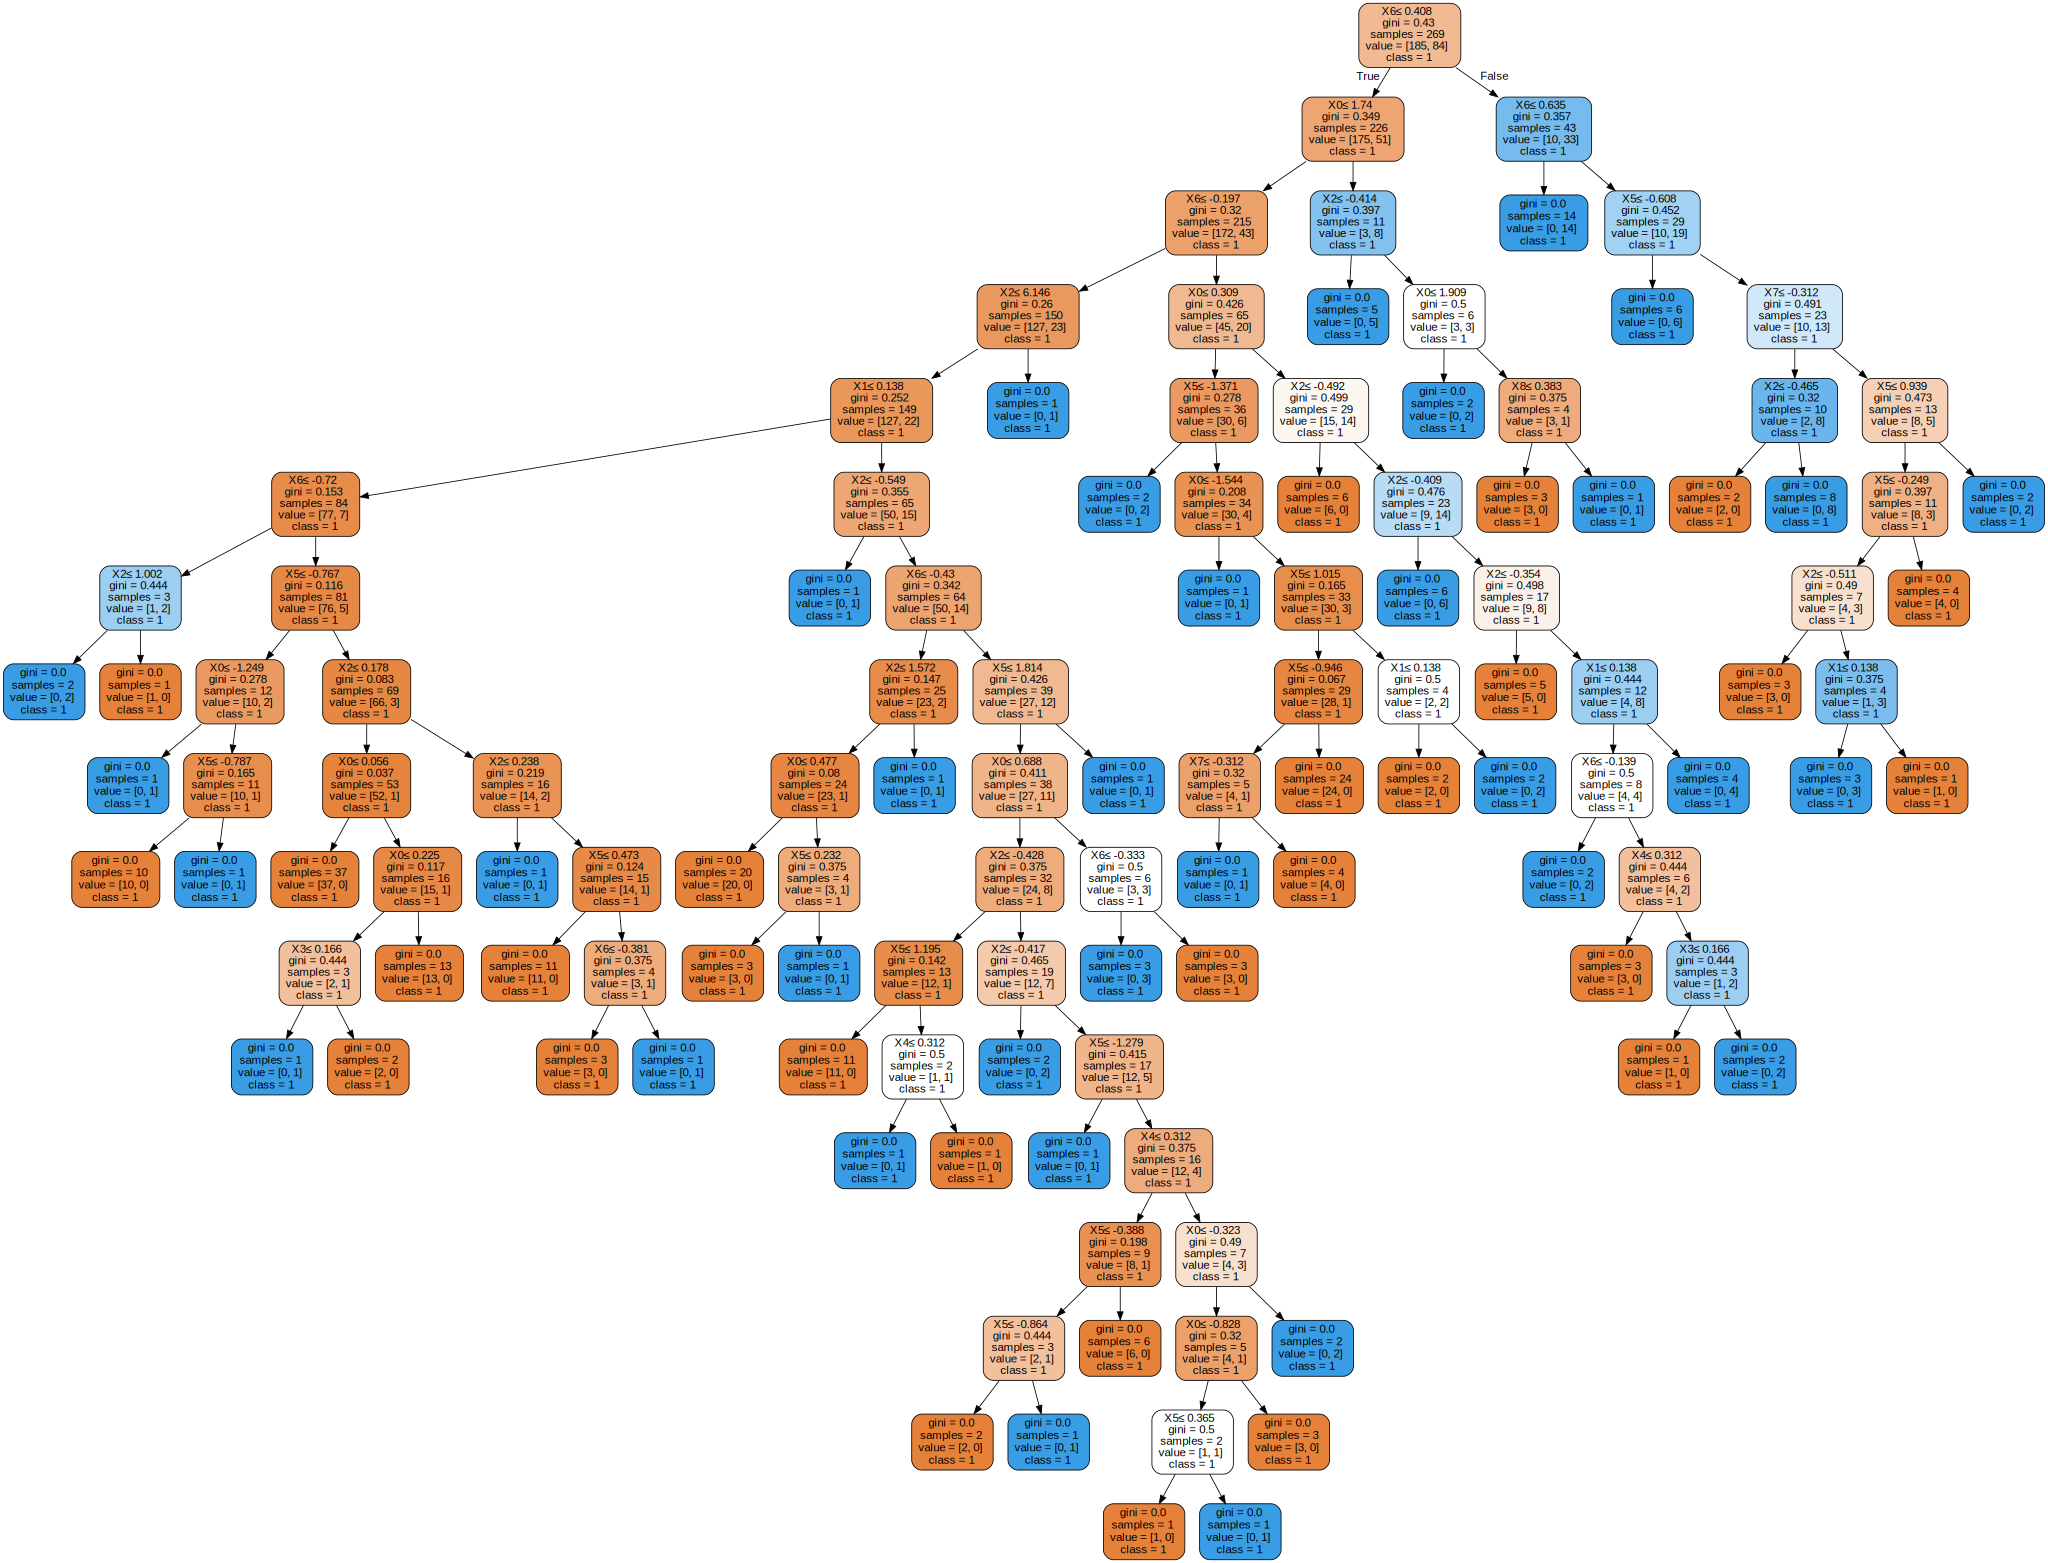

In [28]:
dot_data = export_graphviz(dt_model, out_file=None, 
                      class_names=new_df_scaled['DEATH_EVENT'].astype('str'),  
                      filled=True, rounded=True,  
                      special_characters=True,
                      )  
graph = graphviz.Source(dot_data)
graph

**akurasi model tanpa SMOTE**

In [29]:
y_pred_dt = dt_model.predict(X_test)
accuracy_score_dt = accuracy_score(y_test, y_pred_dt)
accuracy_score_dt

0.7666666666666667

**akurasi model dengan SMOTE**

In [30]:
y_pred_dts = dt_model_s.predict(Xs_test)
accuracy_score_dts = accuracy_score(ys_test, y_pred_dts)
accuracy_score_dts

0.6585365853658537

## Decision Tree with Bagging

In [31]:
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), 
            bootstrap=True, 
            n_jobs=-1
          )
bag_clf_s = BaggingClassifier(
            DecisionTreeClassifier(), 
            bootstrap=True, 
            n_jobs=-1
          )
bag_clf.fit(X_train, y_train)
bag_clf_s.fit(Xs_train, ys_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_jobs=-1)

**akurasi model tanpa SMOTE**

In [32]:
y_pred_dt_bag = bag_clf.predict(X_test)
accuracy_score_dt_bag = accuracy_score(y_test, y_pred_dt_bag)
accuracy_score_dt_bag

0.6666666666666666

**akurasi model dengan SMOTE**

In [33]:
y_pred_dt_bags = bag_clf_s.predict(Xs_test)
accuracy_score_dt_bags = accuracy_score(ys_test, y_pred_dt_bags)
accuracy_score_dt_bags

0.7560975609756098

## Random Forest

In [34]:
rnd_clf = RandomForestClassifier()
rnd_clf_s = RandomForestClassifier()
rnd_clf.fit(X_train, y_train)
rnd_clf_s.fit(Xs_train, ys_train)

RandomForestClassifier()

**akurasi model tanpa SMOTE**

In [35]:
y_pred_rnd_clf = rnd_clf.predict(X_test)
accuracy_score_rnd_clf = accuracy_score(y_test, y_pred_rnd_clf)
accuracy_score_rnd_clf

0.6666666666666666

**akurasi model dengan SMOTE**

In [36]:
y_pred_rnd_clfs = rnd_clf_s.predict(Xs_test)
accuracy_score_rnd_clfs = accuracy_score(ys_test, y_pred_rnd_clfs)
accuracy_score_rnd_clfs

0.8048780487804879

## LogisticRegression

In [37]:
lgr_clf =LogisticRegression(random_state=42)
lgr_clf_s =LogisticRegression(random_state=42)
lgr_clf.fit(X_train, y_train)
lgr_clf_s.fit(Xs_train, ys_train)

LogisticRegression(random_state=42)

**akurasi model tanpa SMOTE**

In [38]:
y_pred_lgr_clf = lgr_clf.predict(X_test)
accuracy_score_lgr_clf = accuracy_score(y_test, y_pred_lgr_clf)
accuracy_score_lgr_clf

0.6666666666666666

**akurasi model dengan SMOTE**

In [39]:
y_pred_lgr_clfs = lgr_clf_s.predict(Xs_test)
accuracy_score_lgr_clfs = accuracy_score(ys_test, y_pred_lgr_clfs)
accuracy_score_lgr_clfs

0.6829268292682927

## SVM

In [40]:
svc = SVC()
svc_s = SVC()
svc.fit(X_train, y_train)
svc_s.fit(Xs_train, ys_train)

SVC()

**akurasi model tanpa SMOTE**

In [41]:
y_pred_svc = svc.predict(X_test)
accuracy_score_svc = accuracy_score(y_test, y_pred_svc)
accuracy_score_svc

0.6333333333333333

**akurasi model dengan SMOTE**

In [42]:
y_pred_svcs = svc_s.predict(Xs_test)
accuracy_score_svcs = accuracy_score(ys_test, y_pred_svcs)
accuracy_score_svcs

0.7560975609756098

## VotingClassifier

In [43]:
voting_clf = VotingClassifier(
                estimators=[('lr', lgr_clf), ('rf', rnd_clf), ('svc', svc)],
                voting='hard'
              )
voting_clf_s = VotingClassifier(
                estimators=[('lr', lgr_clf), ('rf', rnd_clf), ('svc', svc)],
                voting='hard'
              )
voting_clf.fit(X_train, y_train)
voting_clf_s.fit(Xs_train, ys_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

**akurasi model tanpa SMOTE**

In [44]:
y_pred_voting = voting_clf.predict(X_test)
accuracy_score_pred_voting = accuracy_score(y_test, y_pred_voting)
accuracy_score_pred_voting

0.6333333333333333

**akurasi model dengan SMOTE**

In [45]:
y_pred_votings = voting_clf_s.predict(Xs_test)
accuracy_score_pred_votings = accuracy_score(ys_test, y_pred_votings)
accuracy_score_pred_votings

0.7560975609756098

## XGBoost

In [46]:
xgb = XGBClassifier()
xgb_s = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_s.fit(Xs_train, ys_train)

XGBClassifier()

**akurasi model tanpa SMOTE**

In [47]:
y_pred_xgb = xgb.predict(X_test)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_score_xgb

0.6333333333333333

**akurasi model dengan SMOTE**

In [48]:
y_pred_xgbs = xgb_s.predict(Xs_test)
accuracy_score_xgbs = accuracy_score(ys_test, y_pred_xgbs)
accuracy_score_xgbs

0.8292682926829268

## AdaBoost

In [49]:
ada_clf = AdaBoostClassifier(
            DecisionTreeClassifier(), 
            n_estimators=299,
            algorithm="SAMME.R", 
            learning_rate=0.35
          )

ada_clf_s = AdaBoostClassifier(
            DecisionTreeClassifier(), 
            n_estimators=299,
            algorithm="SAMME.R", 
            learning_rate=0.35
          )

ada_clf.fit(X_train, y_train)
ada_clf_s.fit(Xs_train, ys_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.35,
                   n_estimators=299)

**akurasi model tanpa SMOTE**

In [50]:
y_pred_adaBoost = ada_clf.predict(X_test)
accuracy_score_adaBoost = accuracy_score(y_test, y_pred_adaBoost)
accuracy_score_adaBoost

0.7333333333333333

**akurasi model dengan SMOTE**

In [51]:
y_pred_adaBoosts = ada_clf_s.predict(Xs_test)
accuracy_score_adaBoosts = accuracy_score(ys_test, y_pred_adaBoosts)
accuracy_score_adaBoosts

0.6585365853658537

## Extra Trees Classifier

In [52]:
extra_tree = ExtraTreesClassifier()
extra_tree_s = ExtraTreesClassifier()
extra_tree.fit(X_train, y_train)
extra_tree_s.fit(Xs_train, ys_train)

ExtraTreesClassifier()

**akurasi model tanpa SMOTE**

In [53]:
y_pred_tree = extra_tree.predict(X_test)
accuracy_score_tree = accuracy_score(y_test, y_pred_tree)
accuracy_score_tree

0.6333333333333333

**akurasi model dengan SMOTE**

In [54]:
y_pred_trees = extra_tree_s.predict(Xs_test)
accuracy_score_trees = accuracy_score(ys_test, y_pred_trees)
accuracy_score_trees

0.8536585365853658

## GradientBoost

In [55]:
grad_clf = GradientBoostingClassifier()
grad_clf_s = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
grad_clf_s.fit(Xs_train, ys_train)

GradientBoostingClassifier()

**akurasi model tanpa SMOTE**

In [56]:
y_pred_grad_clf = grad_clf.predict(X_test)
accuracy_score_grad_clf = accuracy_score(y_test, y_pred_grad_clf)
accuracy_score_grad_clf

0.6333333333333333

**akurasi model dengan SMOTE**

In [57]:
y_pred_grad_clfs = grad_clf_s.predict(Xs_test)
accuracy_score_grad_clfs = accuracy_score(ys_test, y_pred_grad_clfs)
accuracy_score_grad_clfs

0.7560975609756098

# Evaluasi Model

In [58]:
list_pred = [y_pred_dt,
             y_pred_dt_bag,
             y_pred_rnd_clf,
             y_pred_lgr_clf,
             y_pred_svc,
             y_pred_voting,
             y_pred_xgb,
             y_pred_adaBoost,
             y_pred_tree,
             y_pred_grad_clf]

list_pred_s = [y_pred_dts,
               y_pred_dt_bags,
               y_pred_rnd_clfs,
               y_pred_lgr_clfs,
               y_pred_svcs,
               y_pred_votings,
               y_pred_xgbs,
               y_pred_adaBoosts,
               y_pred_trees,
               y_pred_grad_clfs]

list_model = ['Decision Tree',
              'Decision Tree with Bagging',
              'Random Forest Classifier',
              'Logistic Regression',
              'Support Vector Classifier',
              'Voting Classifier',
              'XGBoost',
              'AdaBoost',
              'Extra Trees Classifier',
              'GradientBoost']

## F1 Score

In [59]:
for i in range(len(list_pred)):
  print('F1 score dari model {} tanpa SMOTE adalah {}'.format(list_model[i], f1_score(y_test,list_pred[i])))
  print('F1 score dari model {} dengan SMOTE adalah {}'.format(list_model[i], f1_score(ys_test,list_pred_s[i])))
  print('============================================')

F1 score dari model Decision Tree tanpa SMOTE adalah 0.6666666666666666
F1 score dari model Decision Tree dengan SMOTE adalah 0.65
F1 score dari model Decision Tree with Bagging tanpa SMOTE adalah 0.5
F1 score dari model Decision Tree with Bagging dengan SMOTE adalah 0.7368421052631577
F1 score dari model Random Forest Classifier tanpa SMOTE adalah 0.4444444444444444
F1 score dari model Random Forest Classifier dengan SMOTE adalah 0.7999999999999999
F1 score dari model Logistic Regression tanpa SMOTE adalah 0.375
F1 score dari model Logistic Regression dengan SMOTE adalah 0.6829268292682927
F1 score dari model Support Vector Classifier tanpa SMOTE adalah 0.4210526315789474
F1 score dari model Support Vector Classifier dengan SMOTE adalah 0.7499999999999999
F1 score dari model Voting Classifier tanpa SMOTE adalah 0.35294117647058826
F1 score dari model Voting Classifier dengan SMOTE adalah 0.7499999999999999
F1 score dari model XGBoost tanpa SMOTE adalah 0.4210526315789474
F1 score dari

## Recall

In [60]:
for i in range(len(list_pred)):
  print('Recall score dari model {} tanpa SMOTE adalah {}'.format(list_model[i], recall_score(y_test,list_pred[i])))
  print('Recall score dari model {} dengan SMOTE adalah {}'.format(list_model[i], recall_score(ys_test,list_pred_s[i])))
  print('============================================')

Recall score dari model Decision Tree tanpa SMOTE adalah 0.5833333333333334
Recall score dari model Decision Tree dengan SMOTE adalah 0.7222222222222222
Recall score dari model Decision Tree with Bagging tanpa SMOTE adalah 0.4166666666666667
Recall score dari model Decision Tree with Bagging dengan SMOTE adalah 0.7777777777777778
Recall score dari model Random Forest Classifier tanpa SMOTE adalah 0.3333333333333333
Recall score dari model Random Forest Classifier dengan SMOTE adalah 0.8888888888888888
Recall score dari model Logistic Regression tanpa SMOTE adalah 0.25
Recall score dari model Logistic Regression dengan SMOTE adalah 0.7777777777777778
Recall score dari model Support Vector Classifier tanpa SMOTE adalah 0.3333333333333333
Recall score dari model Support Vector Classifier dengan SMOTE adalah 0.8333333333333334
Recall score dari model Voting Classifier tanpa SMOTE adalah 0.25
Recall score dari model Voting Classifier dengan SMOTE adalah 0.8333333333333334
Recall score dari 

## Precision

In [61]:
for i in range(len(list_pred)):
  print('Precision score dari model {} tanpa SMOTE adalah {}'.format(list_model[i], precision_score(y_test,list_pred[i])))
  print('Precision score dari model {} dengan SMOTE adalah {}'.format(list_model[i], precision_score(ys_test,list_pred_s[i])))
  print('============================================')

Precision score dari model Decision Tree tanpa SMOTE adalah 0.7777777777777778
Precision score dari model Decision Tree dengan SMOTE adalah 0.5909090909090909
Precision score dari model Decision Tree with Bagging tanpa SMOTE adalah 0.625
Precision score dari model Decision Tree with Bagging dengan SMOTE adalah 0.7
Precision score dari model Random Forest Classifier tanpa SMOTE adalah 0.6666666666666666
Precision score dari model Random Forest Classifier dengan SMOTE adalah 0.7272727272727273
Precision score dari model Logistic Regression tanpa SMOTE adalah 0.75
Precision score dari model Logistic Regression dengan SMOTE adalah 0.6086956521739131
Precision score dari model Support Vector Classifier tanpa SMOTE adalah 0.5714285714285714
Precision score dari model Support Vector Classifier dengan SMOTE adalah 0.6818181818181818
Precision score dari model Voting Classifier tanpa SMOTE adalah 0.6
Precision score dari model Voting Classifier dengan SMOTE adalah 0.6818181818181818
Precision s

## Classification Report

In [62]:
for i in range(len(list_pred)):
  print('=====================================================================')
  print('Classification report dari model {} tanpa menggunakan SMOTE'.format(list_model[i]))
  print('=====================================================================')
  print('{}'.format(classification_report(y_test,list_pred[i])))
  print('\n')
  print('=====================================================================')
  print('Classification report dari model {} dengan menggunakan SMOTE'.format(list_model[i]))
  print('=====================================================================')
  print('{}'.format(classification_report(ys_test,list_pred_s[i])))

Classification report dari model Decision Tree tanpa menggunakan SMOTE
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.78      0.58      0.67        12

    accuracy                           0.77        30
   macro avg       0.77      0.74      0.74        30
weighted avg       0.77      0.77      0.76        30



Classification report dari model Decision Tree dengan menggunakan SMOTE
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        23
           1       0.59      0.72      0.65        18

    accuracy                           0.66        41
   macro avg       0.66      0.67      0.66        41
weighted avg       0.67      0.66      0.66        41

Classification report dari model Decision Tree with Bagging tanpa menggunakan SMOTE
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        18
        

## Confusion Matrix

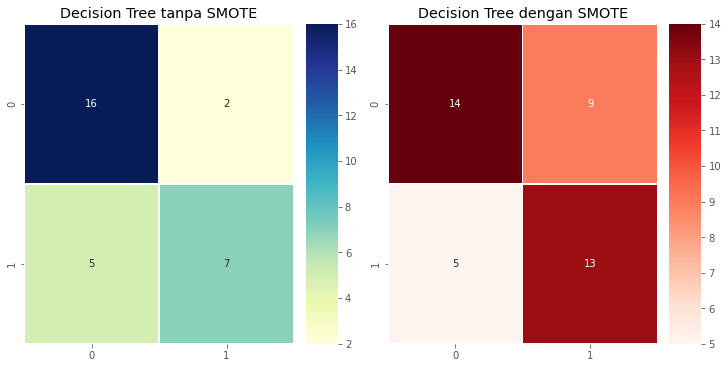

In [63]:
dtm = confusion_matrix(y_test, y_pred_dt)
dtsm = confusion_matrix(ys_test, y_pred_dts)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(dtm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu', ax=ax[0])
ax[0].set_title('Decision Tree tanpa SMOTE')
sns.heatmap(dtsm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds', ax=ax[1])
ax[1].set_title('Decision Tree dengan SMOTE')
plt.savefig("dtm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

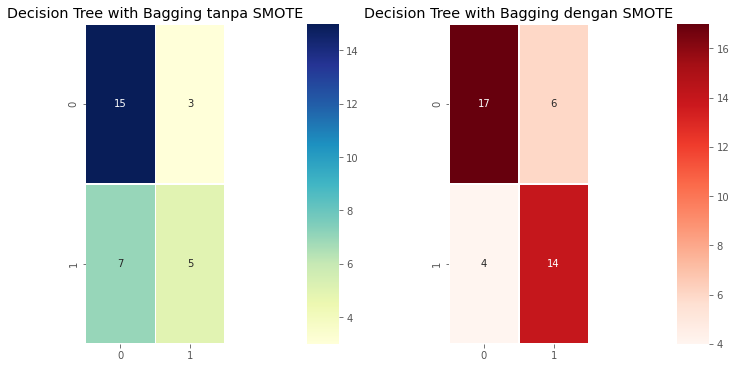

In [64]:
dtbm = confusion_matrix(y_test, y_pred_dt_bag)
dtbsm = confusion_matrix(ys_test, y_pred_dt_bags)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(dtbm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu', ax=ax[0])
ax[0].set_title('Decision Tree with Bagging tanpa SMOTE')
sns.heatmap(dtbsm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds', ax=ax[1])
ax[1].set_title('Decision Tree with Bagging dengan SMOTE')
plt.savefig("dtbm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

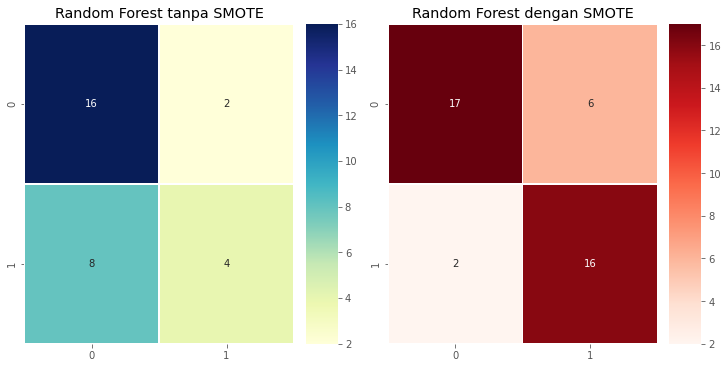

In [65]:
rfm = confusion_matrix(y_test, y_pred_rnd_clf)
rfsm = confusion_matrix(ys_test, y_pred_rnd_clfs)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(rfm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu', ax=ax[0])
ax[0].set_title('Random Forest tanpa SMOTE')
sns.heatmap(rfsm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds', ax=ax[1])
ax[1].set_title('Random Forest dengan SMOTE')
plt.savefig("rfm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

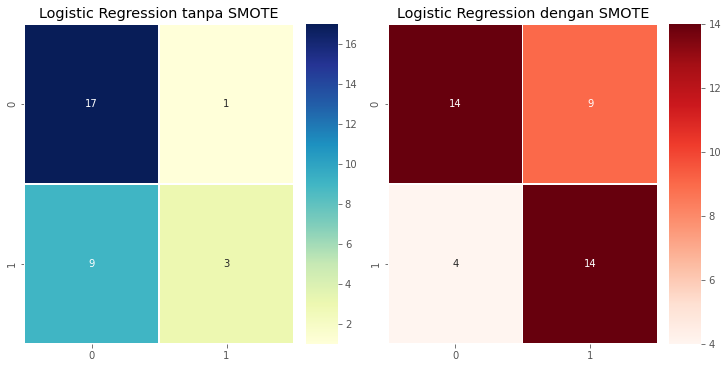

In [66]:
lgrm = confusion_matrix(y_test, y_pred_lgr_clf)
lgrsm = confusion_matrix(ys_test, y_pred_lgr_clfs)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(lgrm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu', ax=ax[0])
ax[0].set_title('Logistic Regression tanpa SMOTE')
sns.heatmap(lgrsm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds', ax=ax[1])
ax[1].set_title('Logistic Regression dengan SMOTE')
plt.savefig("lgrm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

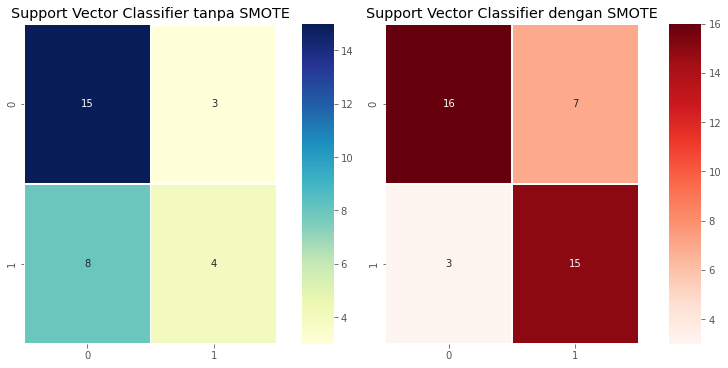

In [67]:
svmm = confusion_matrix(y_test, y_pred_svc)
svmsm = confusion_matrix(ys_test, y_pred_svcs)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(svmm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu', ax=ax[0])
ax[0].set_title('Support Vector Classifier tanpa SMOTE')
sns.heatmap(svmsm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds', ax=ax[1])
ax[1].set_title('Support Vector Classifier dengan SMOTE')
plt.savefig("svmm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

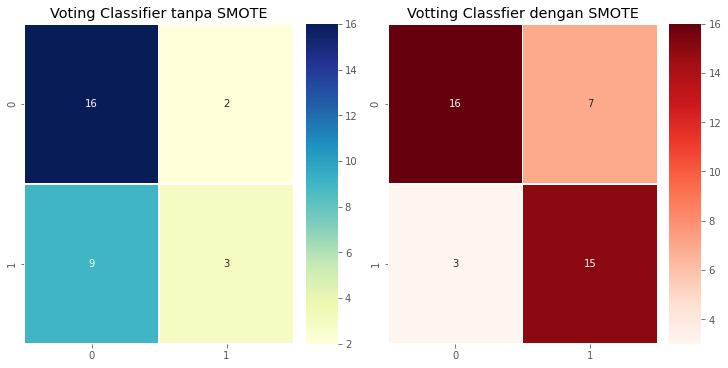

In [68]:
vcm = confusion_matrix(y_test, y_pred_voting)
vcsm = confusion_matrix(ys_test, y_pred_votings)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(vcm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu', ax=ax[0])
ax[0].set_title('Voting Classifier tanpa SMOTE')
sns.heatmap(vcsm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds', ax=ax[1])
ax[1].set_title('Votting Classfier dengan SMOTE')
plt.savefig("vcm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

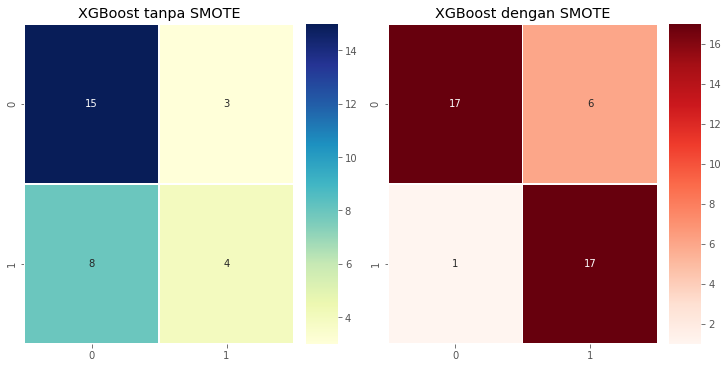

In [69]:
xgbm = confusion_matrix(y_test, y_pred_xgb)
xgbsm = confusion_matrix(ys_test, y_pred_xgbs)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(xgbm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu', ax=ax[0])
ax[0].set_title('XGBoost tanpa SMOTE')
sns.heatmap(xgbsm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds', ax=ax[1])
ax[1].set_title('XGBoost dengan SMOTE')
plt.savefig("xgbm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

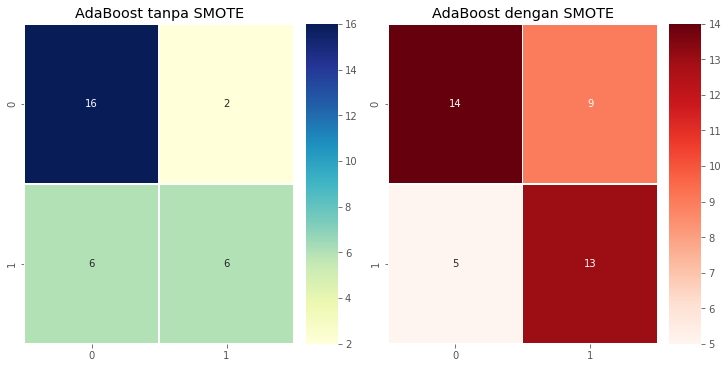

In [70]:
adabm = confusion_matrix(y_test, y_pred_adaBoost)
adabsm = confusion_matrix(ys_test, y_pred_adaBoosts)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(adabm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu', ax=ax[0])
ax[0].set_title('AdaBoost tanpa SMOTE')
sns.heatmap(adabsm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds', ax=ax[1])
ax[1].set_title('AdaBoost dengan SMOTE')
plt.savefig("adabm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

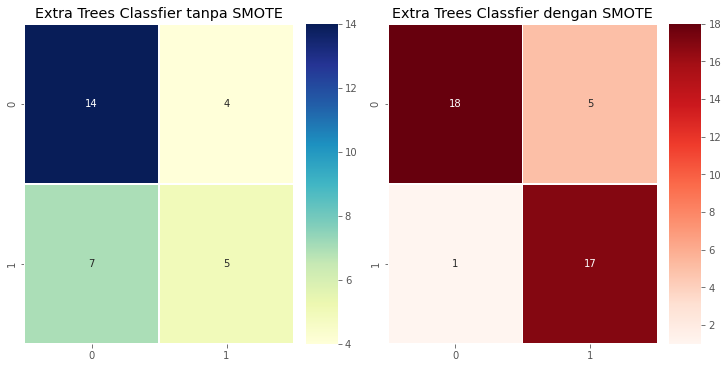

In [71]:
xtm = confusion_matrix(y_test, y_pred_tree)
xtsm = confusion_matrix(ys_test, y_pred_trees)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(xtm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu', ax=ax[0])
ax[0].set_title('Extra Trees Classfier tanpa SMOTE')
sns.heatmap(xtsm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds', ax=ax[1])
ax[1].set_title('Extra Trees Classfier dengan SMOTE')
plt.savefig("xtm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

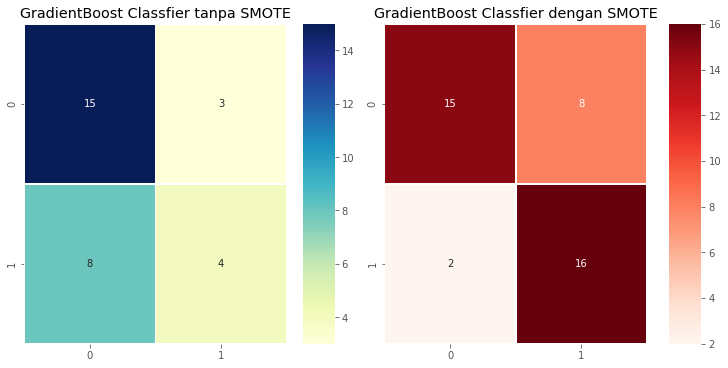

In [72]:
gbm = confusion_matrix(y_test, y_pred_grad_clf)
gbsm = confusion_matrix(ys_test, y_pred_grad_clfs)

fig, ax = plt.subplots(1,2,figsize=(10,5), constrained_layout=True)
sns.heatmap(gbm, annot=True, fmt="d", linewidths=.5, cmap = 'YlGnBu', ax=ax[0])
ax[0].set_title('GradientBoost Classfier tanpa SMOTE')
sns.heatmap(gbsm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds', ax=ax[1])
ax[1].set_title('GradientBoost Classfier dengan SMOTE')
plt.savefig("gbm.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

## Best Model

In [73]:
def finding_max(list_pred,y_test,type_pred=None):
  predicted_value = []
  for index,pred in enumerate(list_pred):
    if(type_pred == 'accuracy'):
      predicted_value.append(accuracy_score(y_test,pred))
    elif(type_pred == 'recall'):
      predicted_value.append(recall_score(y_test,pred))
    elif(type_pred == 'precision'):
      predicted_value.append(precision_score(y_test,pred))
    elif(type_pred == 'f1'):
      predicted_value.append(f1_score(y_test,pred))
  return predicted_value.index(max(predicted_value)),max(predicted_value)

In [74]:
best_accuracy = finding_max(list_pred,y_test,'accuracy')
best_accuracy_s = finding_max(list_pred_s,ys_test,'accuracy')

best_recall = finding_max(list_pred,y_test,'recall')
best_recall_s = finding_max(list_pred_s,ys_test,'recall')

best_precision = finding_max(list_pred,y_test,'precision')
best_precision_s = finding_max(list_pred_s,ys_test,'precision')

best_f1 = finding_max(list_pred,y_test,'f1')
best_f1_s = finding_max(list_pred_s,ys_test,'f1')

print('====================================')
print('Model yang di-training tanpa SMOTE')
print('====================================')
print(f'Model yang memiliki Accuracy Score tinggi adalah {list_model[best_accuracy[0]]} dengan nilai accuracy Score {best_accuracy[1]}')
print(f'Model yang memiliki Precision Score tinggi adalah {list_model[best_precision[0]]} dengan nilai precision Score {best_precision[1]}')
print(f'Model yang memiliki Recall Score tinggi adalah {list_model[best_recall[0]]} dengan nilai recall Score {best_recall[1]}')
print(f'Model yang memiliki F1 Score tinggi adalah {list_model[best_f1[0]]} dengan nilai F1 Score {best_f1[1]}')
print('\n')
print('====================================')
print('Model yang di-training dengan SMOTE')
print('====================================')
print(f'Model yang memiliki Accuracy Score tinggi adalah {list_model[best_accuracy_s[0]]} dengan nilai accuracy Score {best_accuracy_s[1]}')
print(f'Model yang memiliki Precision Score tinggi adalah {list_model[best_precision_s[0]]} dengan nilai precision Score {best_precision_s[1]}')
print(f'Model yang memiliki Recall Score tinggi adalah {list_model[best_recall_s[0]]} dengan nilai recall Score {best_recall_s[1]}')
print(f'Model yang memiliki F1 Score tinggi adalah {list_model[best_f1_s[0]]} dengan nilai F1 Score {best_f1_s[1]}')

Model yang di-training tanpa SMOTE
Model yang memiliki Accuracy Score tinggi adalah Decision Tree dengan nilai accuracy Score 0.7666666666666667
Model yang memiliki Precision Score tinggi adalah Decision Tree dengan nilai precision Score 0.7777777777777778
Model yang memiliki Recall Score tinggi adalah Decision Tree dengan nilai recall Score 0.5833333333333334
Model yang memiliki F1 Score tinggi adalah Decision Tree dengan nilai F1 Score 0.6666666666666666


Model yang di-training dengan SMOTE
Model yang memiliki Accuracy Score tinggi adalah Extra Trees Classifier dengan nilai accuracy Score 0.8536585365853658
Model yang memiliki Precision Score tinggi adalah Extra Trees Classifier dengan nilai precision Score 0.7727272727272727
Model yang memiliki Recall Score tinggi adalah XGBoost dengan nilai recall Score 0.9444444444444444
Model yang memiliki F1 Score tinggi adalah Extra Trees Classifier dengan nilai F1 Score 0.85


# Model Inference

In [75]:
# age=float(input('age :'))
# anaemia=int(input('anaemia :'))
# creatinine_phosphokinase=int(input('creatinine_phosphokinase :'))
# diabetes=int(input('diabetes :'))
# high_blood_pressure=int(input('high_blood_pressure :'))
# platelets=float(input('platelets : '))
# serum_creatinine=float(input('serum_creatinine :'))
# sex=int(input('sex :'))
# smoking=int(input('smoking :'))
# young_person = int(input('young_person :'))

# x_input=[[
#     age,
#     anaemia,
#     creatinine_phosphokinase,
#     diabetes,
#     high_blood_pressure,
#     platelets,
#     serum_creatinine,
#     sex,
#     smoking,
#     young_person
# ]]

# x_input=scaler.fit_transform(x_input)
# y_output=bag_clf_s.predict(x_input)
# if y_output==0:
#     print('tidak meninggal')
# else:
#     print('meninggal')

In [76]:
pickle.dump(extra_tree_s,open('model_ETC.pkl','wb'))

# Kesimpulan

Kesimpulan yang didapatkan dari analisis data adalah 

* Sebesar 67.89% kematian terjadi akibat penyakit jantung. Penyakit jantung sendiri banyak terjadi untuk pasien berjenis kelamin laki-laki.

* Model **Extra Tree Classifier** dengan SMOTE memiliki akurasi tinggi sebesar 82.9% sehingga model tersebut sudah tepat untuk memprediksi keselamatan pasien penyakit jantung